In [1]:
import os 
import cv2 as cv

In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import numpy as np
import matplotlib.pyplot as plt
from argparse import ArgumentParser
from time import time
import os
import random
from sklearn.model_selection import train_test_split

In [ ]:
MAXIMIZED_RUNNINGTIME=1000
# REPRODUCE THE EXP
seed = 123
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
image_path = 'opencv-course/Resources/Photos'

In [9]:
os.path.join(image_path,'cat.jpg')

'opencv-course/Resources/Photos\\cat.jpg'

In [3]:
video_path = 'opencv-course/Resources/Videos'

## Links Used

- https://www.cambridgeincolour.com/tutorials/image-interpolation.htm
- https://www.youtube.com/watch?v=oXlwWbU8l2o

## Low Resolution Image

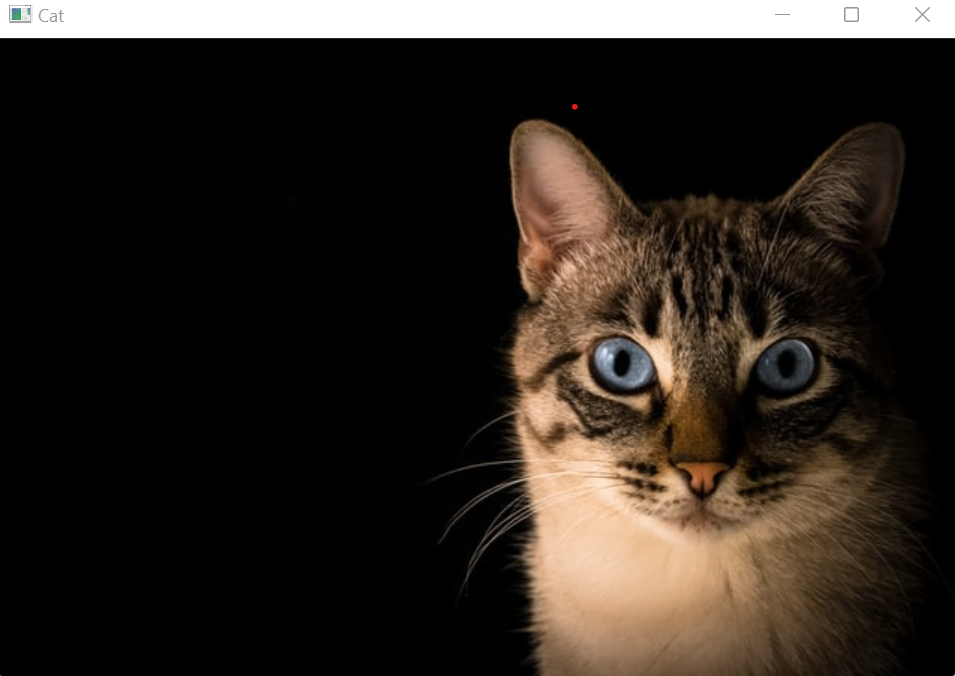

In [4]:
img = cv.imread(os.path.join(image_path,'cat.jpg'))
cv.imshow('Cat', img)
cv.waitKey(0)

-1

## High Resolution Image

In [16]:
#Image goes off screen
img_high = cv.imread(os.path.join(image_path, 'cat_large.jpg'))
cv.imshow('Cat Large',img_high)
cv.waitKey(0)

-1

## Reading Videos

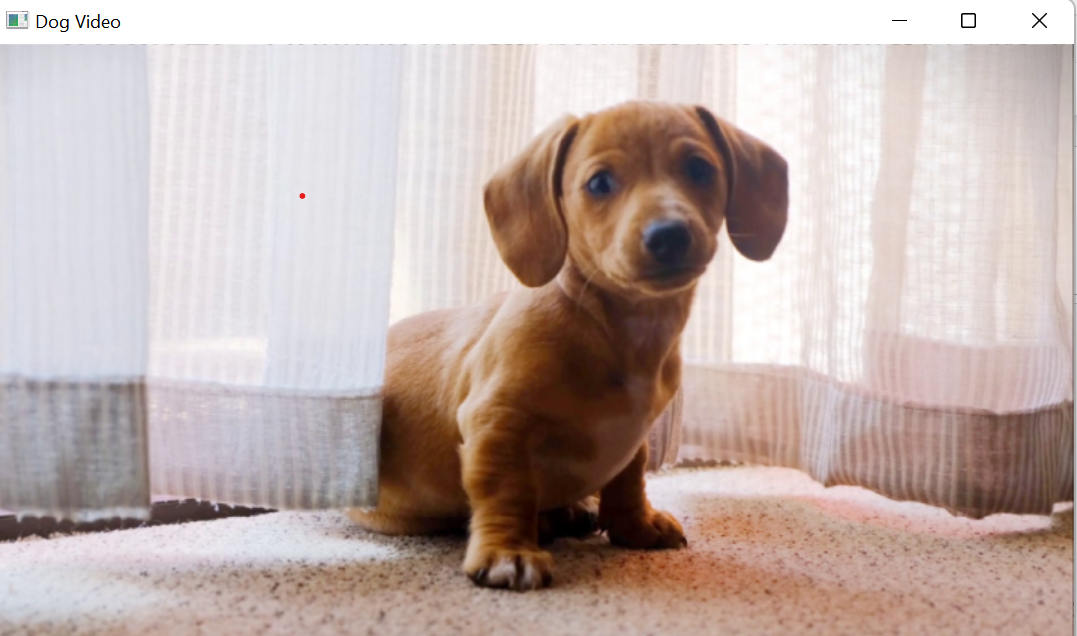

In [8]:

capture = cv.VideoCapture(os.path.join(video_path, 'dog.mp4'))

while capture.isOpened():
    isTrue, frame = capture.read()

    

    if isTrue:
            #Rescaling the Current Frame
        frame_resized = rescaleFrame(frame)
        # Reading in the Video Frame by Frame
      
        cv.imshow('Dog Video', rescaleFrame(frame_resized))
        #Break out of the video loop when d is pressed
        if(cv.waitKey(20) and 0xFF==ord('d')):
             break
    else:
        break
#     # Stop the Video Capture    
capture.release()
    #Close all of the CV Windows
cv.destroyAllWindows()

## Resizing/Rescaling Images and Frames

In [6]:
def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)
    return cv.resize(frame, dimensions, interpolation = cv.INTER_AREA)

In [5]:
#Only works for live video like a web cam, doesn't work for existing video
def changeRes(width, height):
    #Live Video
    capture.set(3,width)
    capture.set(4, height)
    


## Drawing Shapes and Putting Text

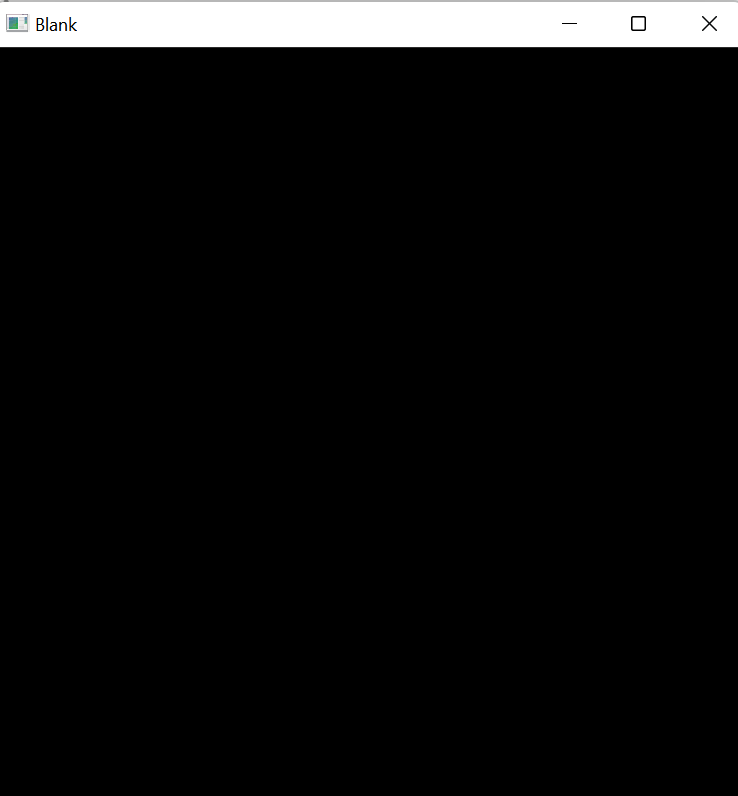

In [26]:
import numpy as np
blank = np.zeros((500,500,3), dtype='uint8')
cv.imshow('Blank', blank)

cv.waitKey(0)
cv.destroyAllWindows()

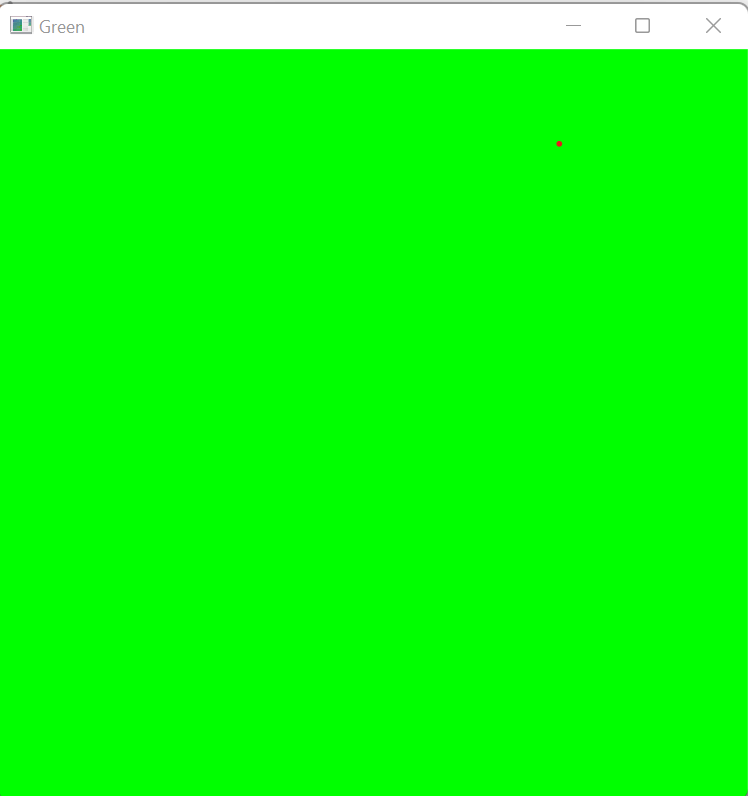

In [10]:
import numpy as np

blank = np.zeros((500,500,3), dtype='uint8')
cv.imshow('Blank', blank)

#Paint Image color
blank1 = blank
blank1[:] = 0,255,0
cv.imshow('Green', blank1)

cv.waitKey(0)
cv.destroyAllWindows()

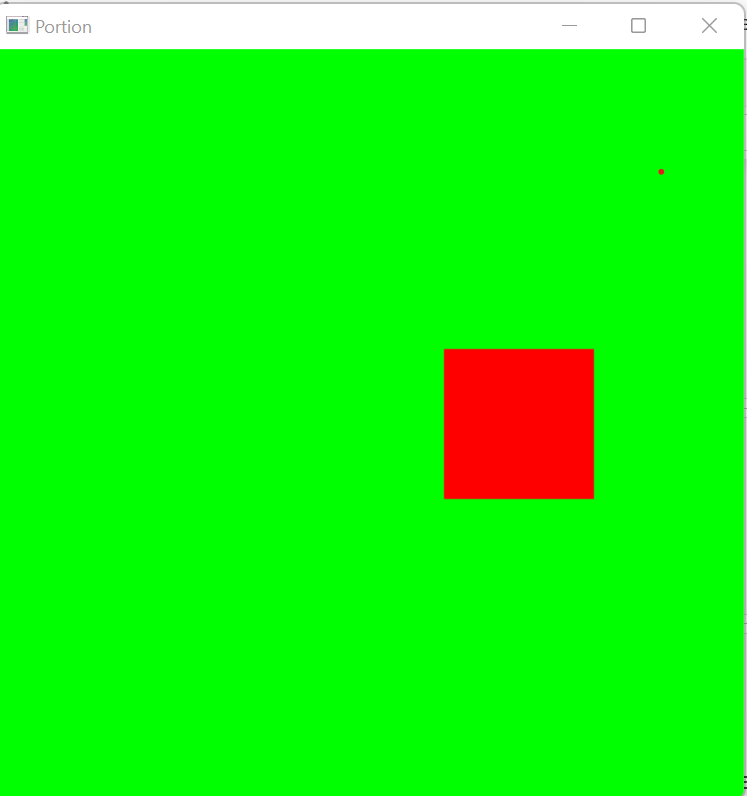

In [ ]:

!conda install nbconvert

In [11]:
# Color certain portion of an Image

blank2 = blank
blank2[200:300, 300:400] = 0,0,255
cv.imshow('Portion', blank2)
cv.waitKey(0)
cv.destroyAllWindows()

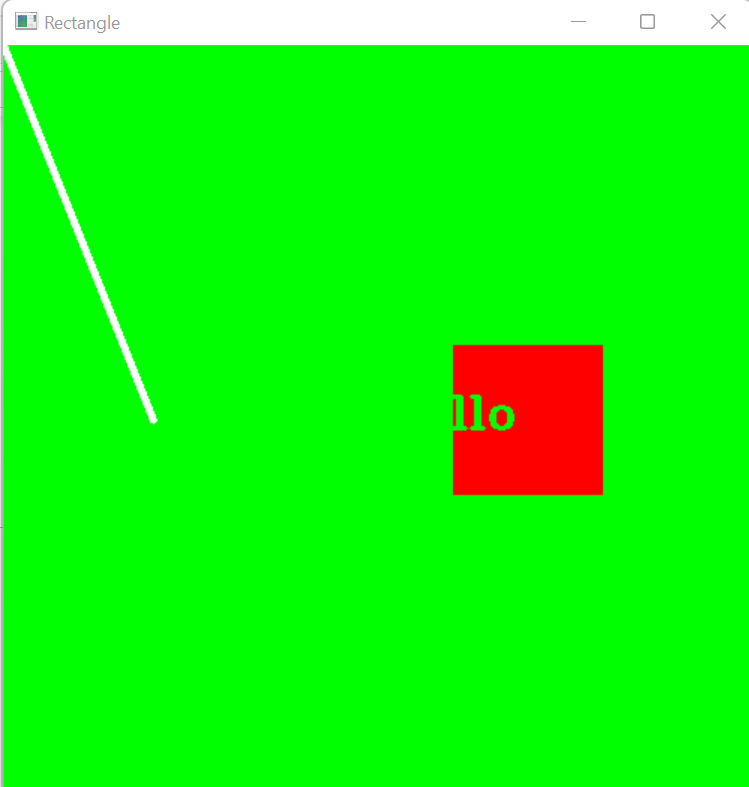

In [12]:
# Draw a Rectangle


cv.line(blank, (0,0), (100,250), (255,255,255), thickness=3)

cv.putText(blank, 'Hello', (255,255), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0),2)
cv.imshow('Rectangle', blank)
cv.waitKey(0)
cv.destroyAllWindows()

## 5 Essential OpenCV Functions

### Grayscaling

- Importance of grayscaling 
  - Dimension reduction: For example, In RGB images there are three color channels and three dimensions while grayscale images are single-dimensional.
  - Reduces model complexity: Consider training neural articles on RGB images of 10x10x3 pixels. The input layer will have 300 input nodes. On the other hand, the same neural network will need only 100 input nodes for grayscale images.
  - For other algorithms to work: Many algorithms are customized to work only on grayscale images e.g. Canny edge detection function pre-implemented in the OpenCV library works on Grayscale images only.

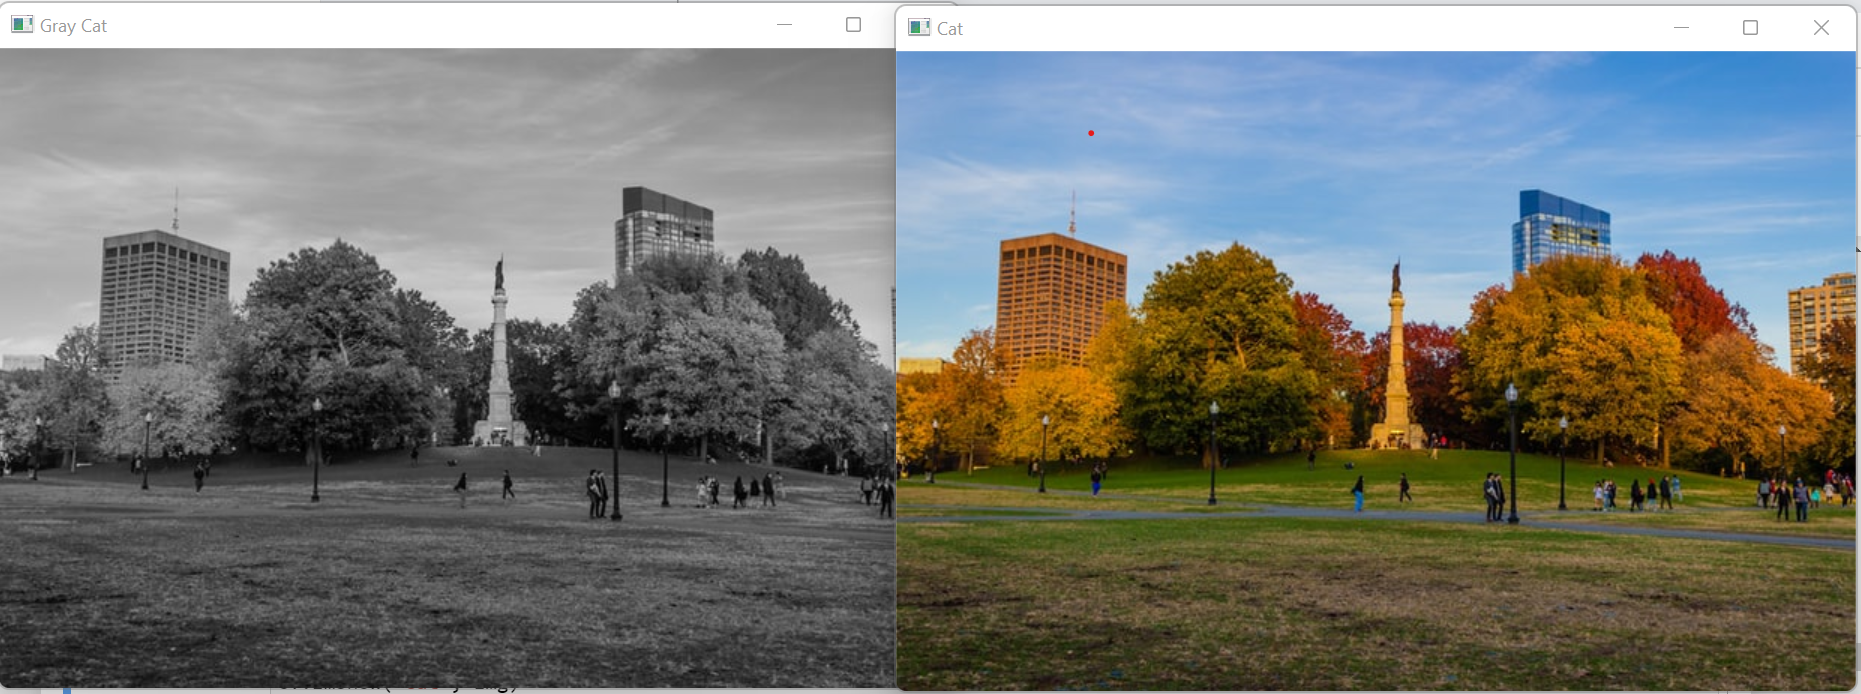

In [13]:
img = cv.imread(os.path.join(image_path, 'park.jpg'))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Cat', img)
cv.imshow('Gray Cat', gray)
cv.waitKey(0)

-1

### Image Blurring

- Blurring
  - Blurring Images can reduce the noise in an image, like Random Brightness Spots
  - It can also reduce the size and dimensions in the Image
  - Blurring can also be used for security purposes
  - Guassian Blur Filter
    - We choose a kernel size (Pixel Range) and average every pixel in the kernel using the Guassian Distribution and replace the pixel with the average
    - The bigger the kernel size the more blur we have in the Image

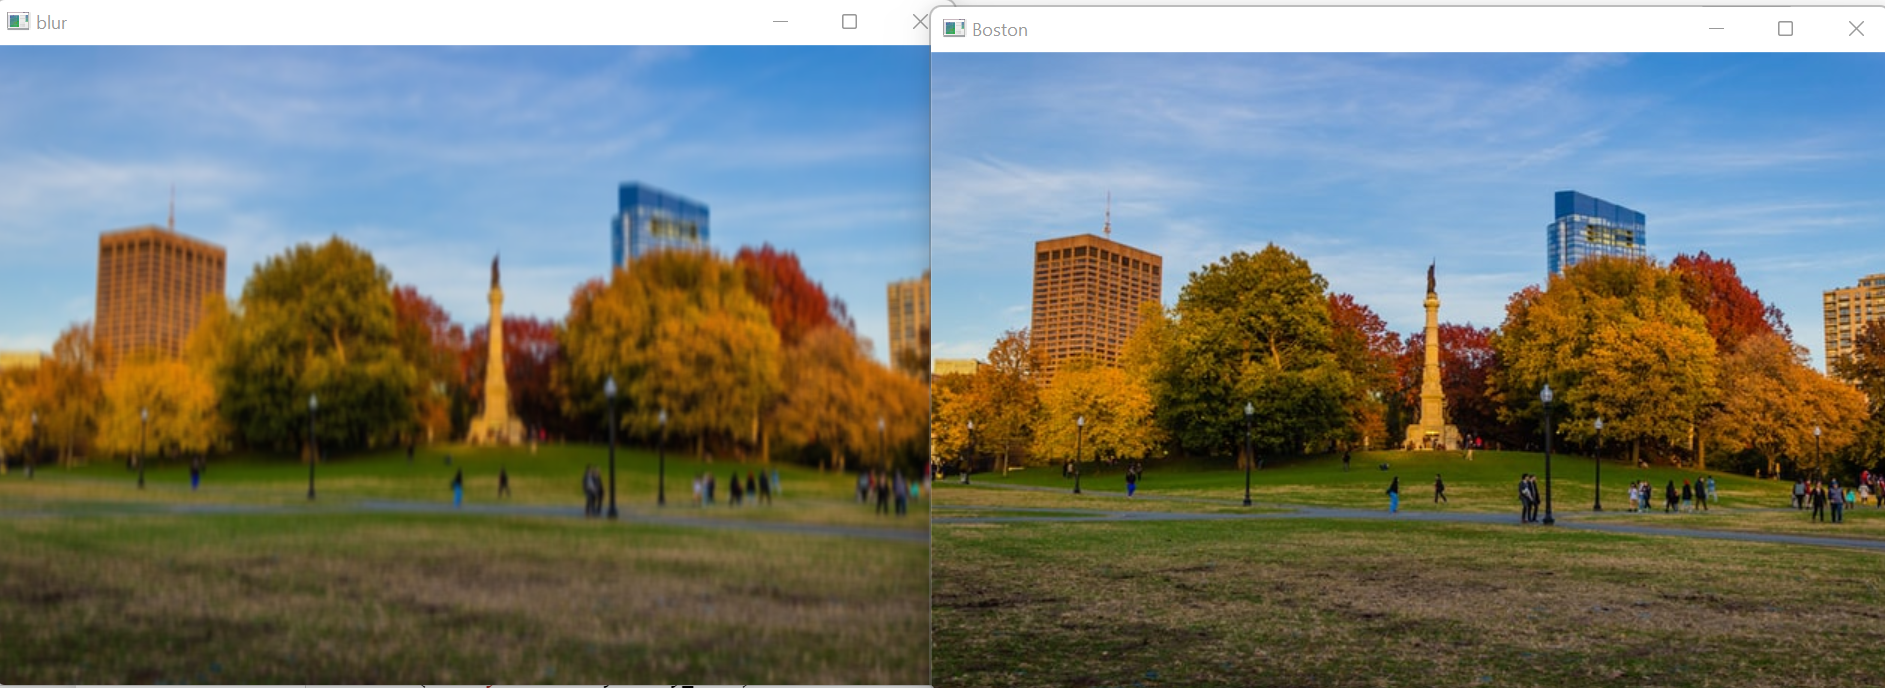

In [16]:
blur =  cv.GaussianBlur(img, (3,7), cv.BORDER_DEFAULT)
cv.imshow('blur', blur)
cv.imshow('Boston', img)
cv.waitKey(0)

-1

### Canny Edge Detection

- Canny Edge Detection detects edges/features by the changes in the color intensity. That is why we calculate the directional gradients/magnitude of the gradient
- Blurring an Image allows us to detect the Features in the Image more conciseley
  - Blurring an image reduces noise in the image 
  
- Right Image is Edge Detection without blurring the image and we pick up a lot of Unwanted Features in the Image
  - Left Image is the edge detection ran on the blurred Image

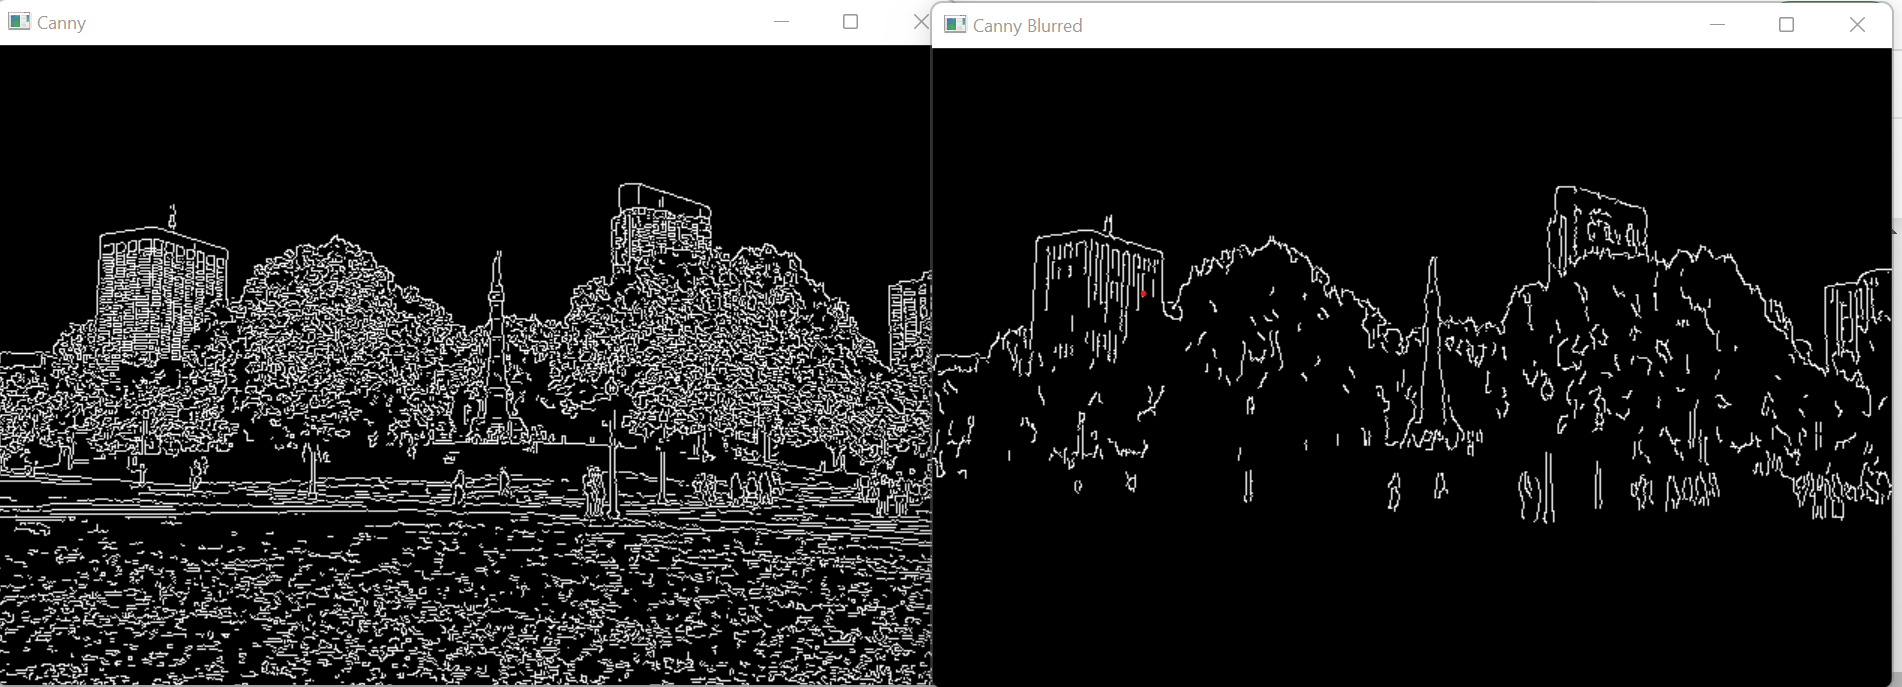

In [17]:
canny = cv.Canny(img, 125, 175)
canny_blur = cv.Canny(blur, 125, 175)
cv.imshow('Canny', canny)
cv.imshow('Canny Blurred', canny_blur)
cv.waitKey(0)

-1

### Dilating the Image


- Dilating an Image will make the Edges much more visible and Thicker
  - The value of the output pixel is the maximum value of all pixels in the neighborhood. In a binary image, a pixel is set to 1 if any of the neighboring pixels have the value 1. Morphological dilation makes objects more visible and fills in small holes in objects. Lines appear thicker, and filled shapes appear larger.

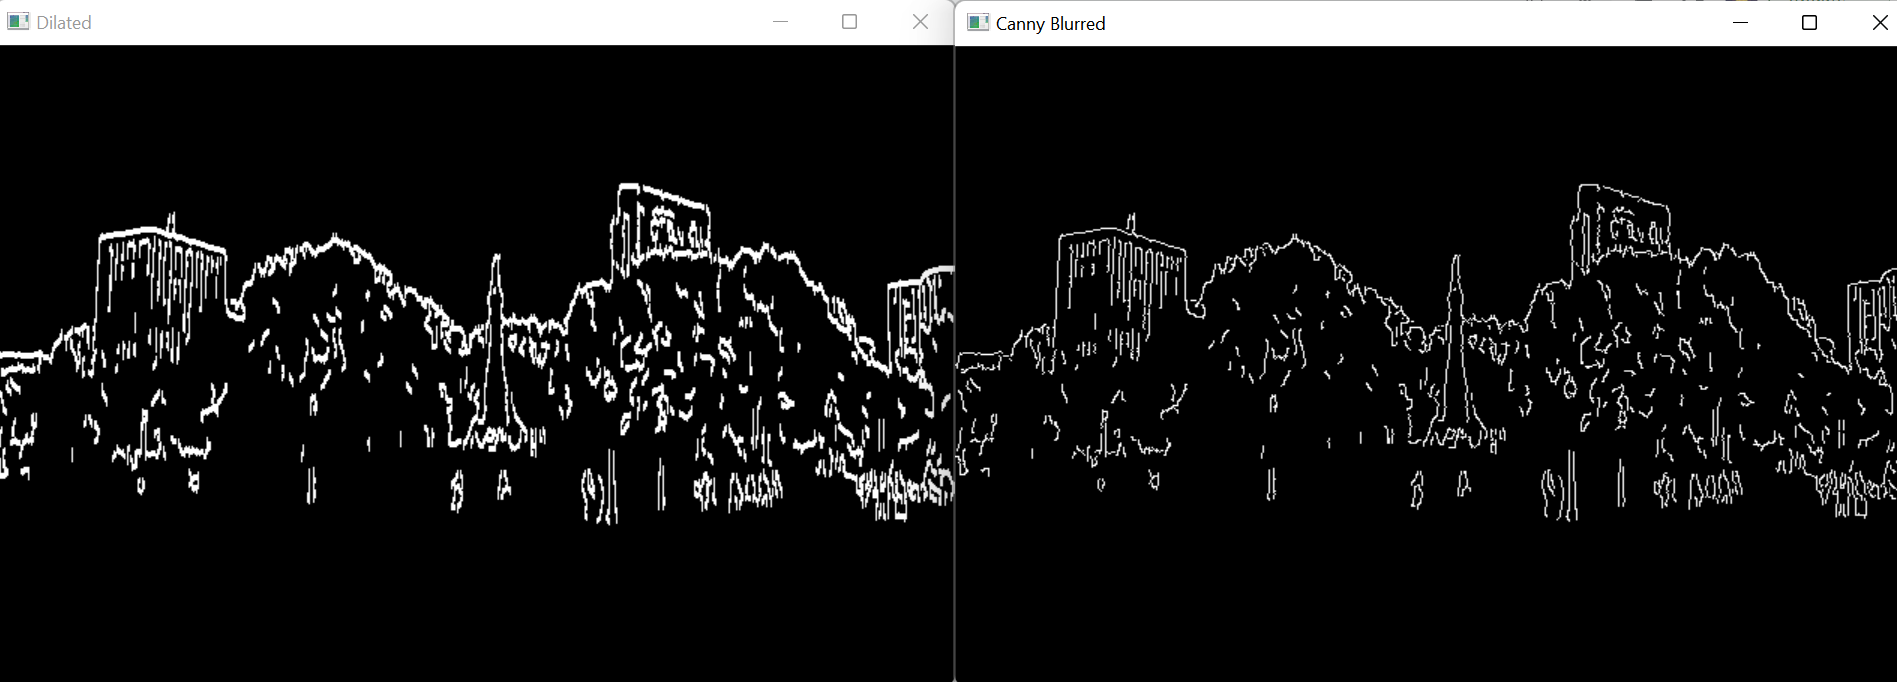

In [18]:
dilated = cv.dilate(canny_blur, (7,7), iterations=3)
cv.imshow('Dilated', dilated)
cv.imshow('Canny Blurred', canny_blur)
cv.waitKey(0)

-1

### Eroding a Dilated Image

In [19]:
eroded = cv.erode(dilated, (7,7), iterations=3)
cv.imshow('Erode', eroded)
cv.imshow('Dilated', dilated)
cv.imshow('Canny Blurred', canny_blur)
cv.waitKey(0)

-1

### Resize/Crop Image

- Digital Image Interpolation
  - This happens any time we want to resize or remap an image to another pixel space
  - Interpolation works any time we want to estimate the unknown points
    - Linear Interpolation
      - 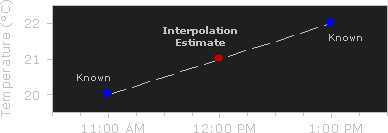
 
 
      

- Nonlinear Interpolation
  - Nearest neighbor is the most basic and requires the least processing time of all the interpolation algorithms because it only considers one pixel — the closest one to the interpolated point. This has the effect of simply making each pixel bigger.

- Bilinear Interpolation
  - 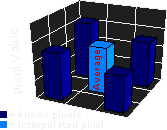
  - Bilinear interpolation considers the closest 2x2 neighborhood of known pixel values surrounding the unknown pixel. It then takes a weighted average of these 4 pixels to arrive at its final interpolated value. This results in much smoother looking images than nearest neighbor.

- Bicubic Interpolation
  - 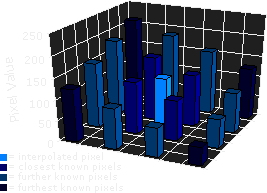
  - Bicubic goes one step beyond bilinear by considering the closest 4x4 neighborhood of known pixels — for a total of 16 pixels. Since these are at various distances from the unknown pixel, closer pixels are given a higher weighting in the calculation. Bicubic produces noticeably sharper images than the previous two methods,

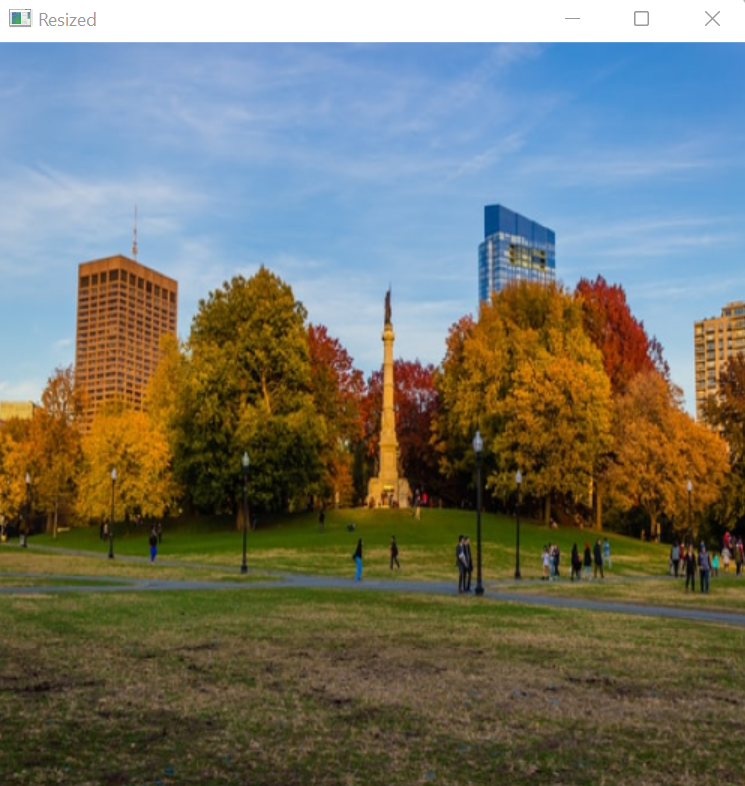

In [20]:
#Resizing the Image
#Inter Area is useful for shrinking the Image
#Inter Cubic/Linear is useful for Enlarging the Image
resized = cv.resize(img, (500,500), interpolation=cv.INTER_AREA)
cv.imshow('Resized', resized)
cv.waitKey(0)

-1

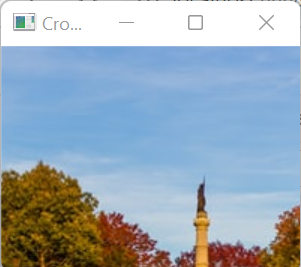

In [21]:
cropped = img[50:200, 200:400]
cv.imshow('Cropped', cropped)
cv.waitKey(0)

-1

In [8]:
print(cropped.shape)
print(img.shape)

(150, 200, 3)
(427, 640, 3)


# Image Transformations

In [14]:
import numpy as np
def translate(image, x, y):
    transMat = np.float32([[1,0,x], [0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)
translated = translate(img, 100, 100)
cv.imshow('Translated', translated)
cv.waitKey(0)


-1

In [15]:
def rotate(img, angle, rotPoint=None):
    (height, width) = img.shape[:2]
    if rotPoint is None:
        rotPoint = (width//2, height//2)
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width, height)
    return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, 45)
cv.imshow('Rotated', rotated)
cv.waitKey(0)

-1

In [22]:
cubic = cv.resize(img, (500, 500), interpolation=cv.INTER_CUBIC)
cv.imshow('Resized', cubic)
cv.waitKey(0)

-1

# Contour Detection

- Contour detection is similar to Canny Edge detection where we want to discover import features in the Image
  - However Contour Edge detection uses continuous points/lines instead of Color Intensities to detect Features
  - Contour detection is useful for image classification at the pixel level called semantic segmentation
  

In [23]:
#retr_list returns all contours
#chain_approx returns all contours
#Blurring removes a lot of Contours
countours, hierarchies = cv.findContours(canny_blur, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(len(countours), 'Found')

417 Found


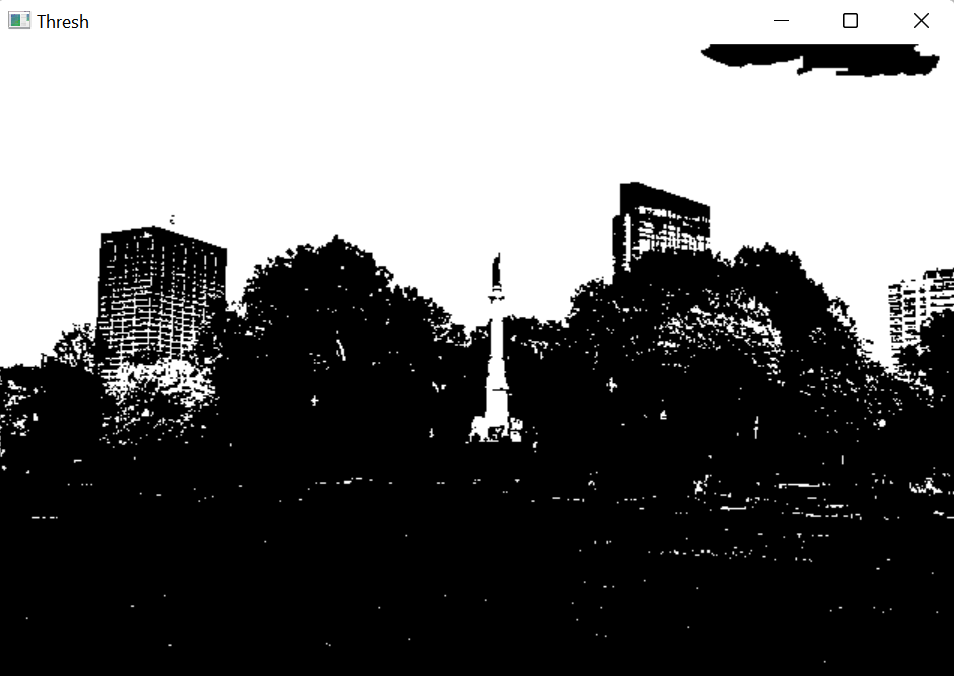

In [24]:
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
cv.imshow('Thresh', thresh)
cv.waitKey(0)
countours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(len(countours), 'Found')

1138 Found


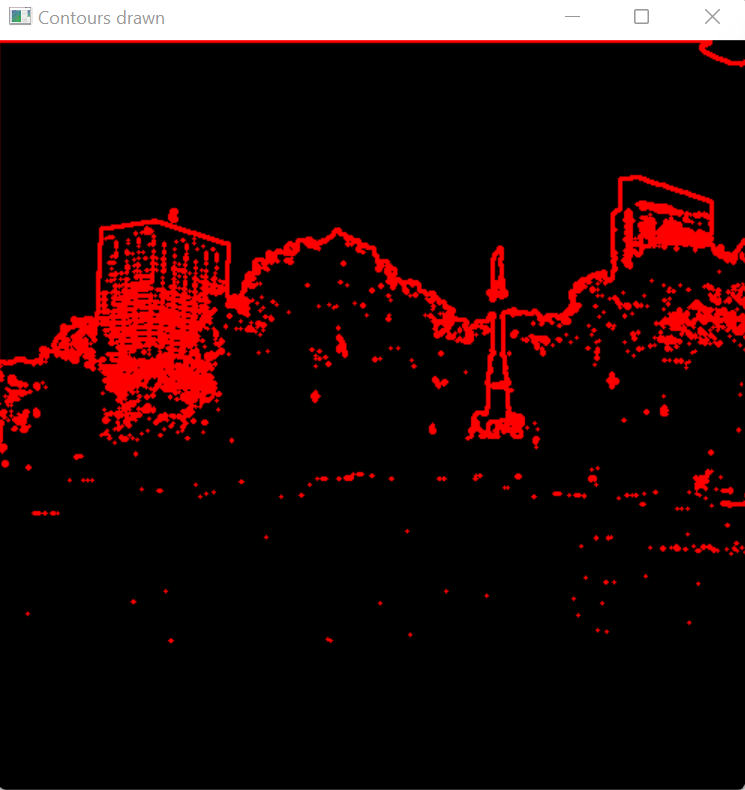

In [28]:
#Draw the Contours
cv.drawContours(blank, countours, -1, (0,0,255),2)
cv.imshow('Contours drawn', blank)
cv.imshow('Thresh', thresh)
cv.waitKey(0)

-1

# Color Spaces

In [5]:
img = cv.imread(os.path.join(image_path, 'park.jpg'))
cv.imshow('Boston', img)

#Changing the color to gray
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

#BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('HSV', hsv)
cv.waitKey(0)

lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('lab', lab)
cv.waitKey(0)

-1

# Histogram Computation

- Shows the Number of Pixels in an Image in each Different Intensity Value
  - In Other Words, shows the number of pixels associated with certain colors
- This can help us because we can reduce the number of pixels in a certain color area in order to focus on a specific object

In [29]:
img = cv.imread(os.path.join(image_path, 'cats 2.jpg'))
cv.imshow('Cats', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('grays', gray)

#We pass in [0] because we want the gray color channel



cv.waitKey(0)

-1

#### About 4000 pixels with an intensity of 60

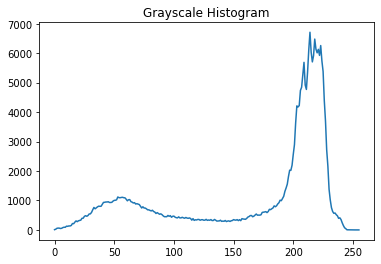

In [21]:
import matplotlib.pyplot as plt
gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.plot(gray_hist)

#### This makes sense because most of the Image is white

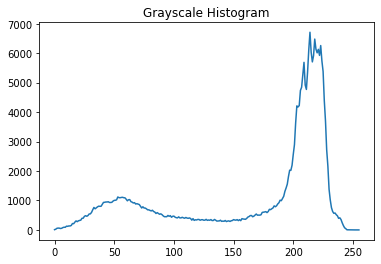

In [14]:
gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.plot(gray_hist)

# Masking Image Processing

- Masking in Image Processing is when we define a small image piece and we use it to modify a larger image
- If we want to find the location of the larger object and there is a smaller object in the image, we can mask out the smaller image

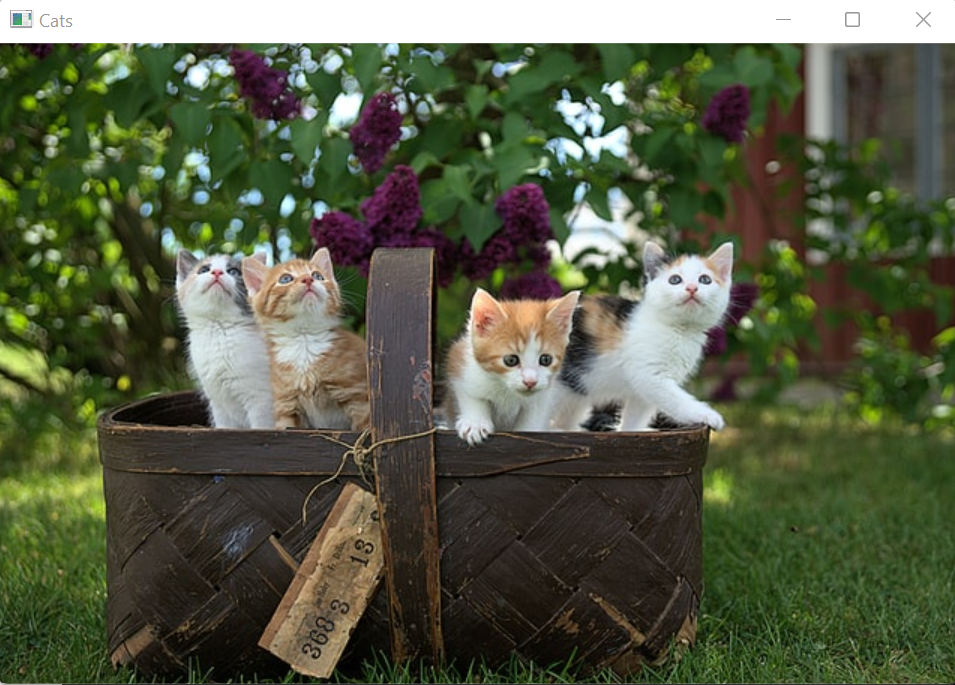

In [32]:
img = cv.imread(os.path.join(image_path, 'cats.jpg'))
cv.imshow('Cats', img)

cv.waitKey(0)

-1

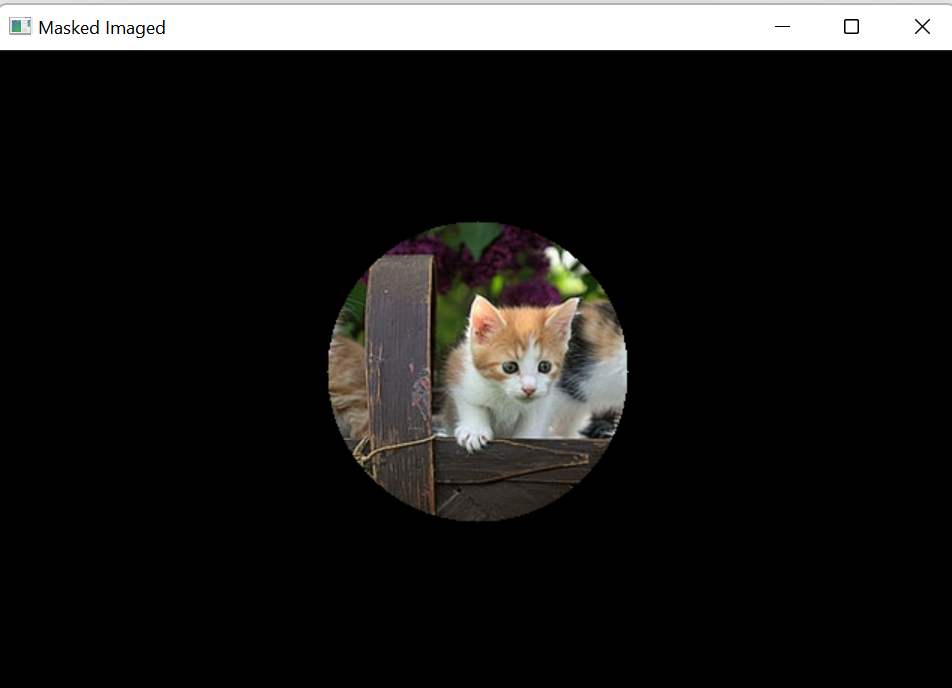

In [31]:
import numpy as np
blank = np.zeros(img.shape[:2], dtype='uint8')
cv.imshow('Blank Image', blank)

mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1 )
cv.imshow('Mask', mask)

masked = cv.bitwise_and(img, img, mask=mask)
cv.imshow('Masked Imaged', masked)

cv.waitKey(0)

-1